# Example of an Unconstrained Optimization based on Gradient Methods

$$ f(x,y) = 3\cdot x^2 + y^4 $$


First Necessary Condition:

$$ \nabla f(x) = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}) = (6x, 4y) $$

$$ \nabla f(x^*) = (0,0) $$

The first condition is satisfied.

Second Necessary Condition:

$$ \nabla^2 f(x) = $$ \begin{bmatrix}                
					  \frac{\partial^2 f}{\partial x \partial x},   \frac{\partial^2 f}{\partial x\partial y} \\
					  \frac{\partial^2 f}{\partial y \partial x},   \frac{\partial^2 f}{\partial y\partial y}
					  \end{bmatrix} =
					  \begin{bmatrix}     
					  6,   0 \\ 
					  0,   4
					  \end{bmatrix}

Verify the sign of the Hessian:

$$ det(\lambda \textit{I}-\nabla^2 f(x)) = 0 $$
	
$$ det $$ \begin{bmatrix}                
		  \lambda -6,   0 \\ 
		  0,   \lambda -4
		  \end{bmatrix} $$ = (\lambda-6)(\lambda-4) = 0 $$

The eigenvalues are $\lambda_{1,2} = (6,4)$, which are both positive, therefore the Hessian is positive definite. This satisfies also the sufficient condition, then $x^{*}$ is a strict unconstrained local minimum of $f(x,y)$.

The function is positive definite $\forall(x,y) \in \Re^2$, so the function is convex and $x^{*}$ is a global minimum for the function.

## Steepest Descent Gradient Method
 
Apply two iterations of Steepest Descent Gradient and of the Newton's Method with $a_k=0.1$ and $x_0 = (1,-2)$:

The Steepest Descent and the Newton's Method are based on the following iterative equation:

$$ x^{k+1} = x^{k}-\alpha^{k}D^{k}\nabla f(x^k) $$

with $D^{k}$ positive definite.

The condition $\nabla f(x^k)^T \cdot d_k$ holds since $d_k = -D^{k}\nabla f(x^k)$, meaning that:

$$ \nabla f(x^k)^TD^{k}\nabla f(x^k) >0 $$

### In this case:

$D^{k} = I$ and therefore:

$$ f(x^{0})=3+16 = 19 $$

\begin{equation}
     x^{1} = \begin{bmatrix}                
		1 \\ 
		-2
		\end{bmatrix} -0.1 \begin{bmatrix}                
			6x^0(1) \\ 
			4x^0(2)
			\end{bmatrix} = \begin{bmatrix}                
				1 \\ 
				-2
				\end{bmatrix} -0.1 \begin{bmatrix}                
				6 \\ 
				-8
				\end{bmatrix} = \begin{bmatrix}                
					0.4 \\ 
					-1.2
					\end{bmatrix}
\end{equation}

\begin{equation}
	f(x^{1})= 2.55
\end{equation}


\begin{equation}
	x^{2} = \begin{bmatrix}                
		0.4 \\ 
		-1.2
		\end{bmatrix} -0.1 \begin{bmatrix}                
			6x^1(1) \\ 
			4x^1(2)
			\end{bmatrix} = \begin{bmatrix}                
				1 \\ 
				-2
				\end{bmatrix} -0.1 \begin{bmatrix}                
				2.4 \\ 
				-4.8
				\end{bmatrix} = \begin{bmatrix}                
					0.16 \\ 
					-0.72
					\end{bmatrix}
\end{equation}

$$ f(x^{2})= 0.3447 $$


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d



D = np.eye(2)

alpha_st = 0.1

gr = np.array([[6, 4]])                     #gradient
gr = np.transpose(gr)

x_init = np.array([[1,-2]])
x_init = np.transpose(x_init)

def gradient_method(alpha,x,D,gr):
    x1 = []
    x2 = []
    f_list = []

    for i in range(5):
        f = 3*x[0]**2+2*x[1]**2
        x1.append(np.asarray(x)[0])
        x2.append(np.asarray(x)[1])
        x = x -alpha*D*np.asmatrix(gr*np.asarray(x))

        f_list.append(f)
    return x1, x2, f_list

[x1_st,x2_st,f_st] = gradient_method(alpha_st,x_init,D,gr)


### Plot

[11 3.3599999999999994 1.1136 0.38553599999999993 0.13633536]


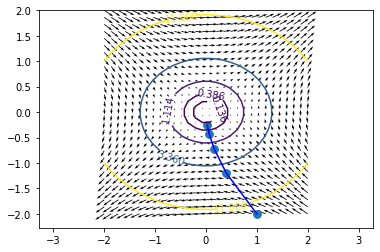

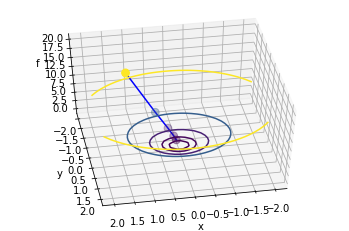

In [15]:
def plot_function():
    x = np.linspace(-2, 2, 30)
    y = np.linspace(-2, 2, 30)
    X, Y = np.meshgrid(x, y, indexing = 'ij', sparse=False)
    F = 3*X**2 + 2*Y**2
    dFdx, dFdy = np.gradient(F)  # dh/dx, dh/dy
    return x, y, F, dFdx, dFdy

[x, y, F, dFdx, dFdy] = plot_function()

fig = plt.figure(1)
# Default two-dimensional contour plot with 7 colored lines
z_data = 3*np.asarray(x1_st)[:,0]**2+2*np.asarray(x2_st)[:,0]**2
x_data = np.asarray(x1_st)[:,0]
y_data = np.asarray(x2_st)[:,0]
ax = fig.gca()
levels = np.asarray(f_st)[:,0]
print(levels)
level_st = []
for i in range(len(levels)):
    level_st.append(levels[i])
ax.quiver(x, y, dFdx, dFdy, color='k',
            angles='xy', scale_units='xy')
cs = ax.contour(x, y, F, levels = level_st[::-1])
plt.clabel(cs)
ax.scatter(x_data,y_data, s=60, marker="o")
plt.plot(x_data,y_data,'b')

plt.axis('equal')
plt.show()

fig = plt.figure(2)
ax = plt.axes(projection = '3d')
ax.plot(x_data,y_data,z_data,'b')
ax.scatter3D(x_data,y_data,z_data,c=z_data, s=60, marker="o")
cs = ax.contour3D(x, y, F, 50,levels=level_st[::-1])
plt.clabel(cs)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')
ax.view_init(50, 80)
plt.show()


## Newton's Method

In this case $D^{k} = (\nabla^2 f(x^k))^-1$ that is:

\begin{equation}
	(\nabla^2 f(x^k))^-1 = \frac{1}{24}\begin{bmatrix}                
		4, 0 \\ 
		0, 6
		\end{bmatrix} = \begin{bmatrix}                
			0.166, 0 \\ 
			0, 0.25
			\end{bmatrix}
\end{equation}

In [18]:
D = np.array([
    [0.166, 0],
    [0, 0.25]
    ])

alpha_new = 0.6

[x1_new,x2_new,f_new] = gradient_method(alpha_new,x_init,D,gr)

[11 1.7657772800000002 0.2834598552547329 0.04550505684361261
 0.007305337609565173]


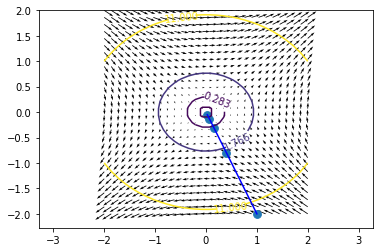

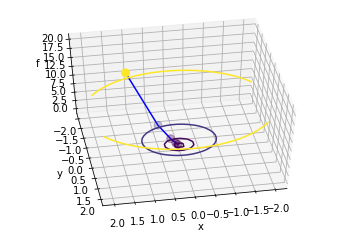

In [19]:
fig = plt.figure(3)
# Default two-dimensional contour plot with 7 colored lines
z_data = 3*np.asarray(x1_new)[:,0]**2+2*np.asarray(x2_new)[:,0]**2
x_data = np.asarray(x1_new)[:,0]
y_data = np.asarray(x2_new)[:,0]
ax = fig.gca()
levels = np.asarray(f_new)[:,0]
print(levels)
level_new = []
for i in range(len(levels)):
    level_new.append(levels[i])
ax.quiver(x, y, dFdx, dFdy, color='k',
            angles='xy', scale_units='xy')
cs = ax.contour(x, y, F, levels = level_new[::-1])
plt.clabel(cs)
ax.scatter(x_data,y_data, s=60, marker="o")
plt.plot(x_data,y_data,'b')

plt.axis('equal')
plt.show()

fig = plt.figure(4)
ax = plt.axes(projection = '3d')
ax.plot(x_data,y_data,z_data,'b')
ax.scatter3D(x_data,y_data,z_data,c=z_data, s=60, marker="o")
cs = ax.contour3D(x, y, F, 50,levels=level_new[::-1])
plt.clabel(cs)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')
ax.view_init(50, 80)
plt.show()